MLI Module 4 Assignment 2, Lukas Zbinden, 2020/03/20.

Also see http://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step/

In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format # suppress scientifc notation for floats

In [2]:
# weights and biases to learn with their initial values
w1 = 0.82
w2 = 0.53
w3 = 0.44
w4 = 0.15
w5 = 0.61
w6 = 0.39
w7 = 0.11
w8 = 0.41
w9 = 0.50
w10 = 0.45
w11 = 0.23
w12 = 0.68
w13 = 0.49
w14 = 0.71
w15 = 0.23
w16 = 0.21
w17 = 0.44
w18 = 0.62
b1 = 0.5
b2 = 0.5
orig_w1  = w1 
orig_w2  = w2 
orig_w3  = w3 
orig_w4  = w4 
orig_w5  = w5 
orig_w6  = w6 
orig_w7  = w7 
orig_w8  = w8 
orig_w9  = w9 
orig_w10 = w10
orig_w11 = w11
orig_w12 = w12
orig_w13 = w13
orig_w14 = w14
orig_w15 = w15
orig_w16 = w16
orig_w17 = w17
orig_w18 = w18
orig_b1  = b1 
orig_b2  = b2 

In [3]:
def reset_weights():
    global w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, b1, b2
    w1  = orig_w1 
    w2  = orig_w2 
    w3  = orig_w3 
    w4  = orig_w4 
    w5  = orig_w5 
    w6  = orig_w6 
    w7  = orig_w7 
    w8  = orig_w8 
    w9  = orig_w9 
    w10 = orig_w10
    w11 = orig_w11
    w12 = orig_w12
    w13 = orig_w13
    w14 = orig_w14
    w15 = orig_w15
    w16 = orig_w16
    w17 = orig_w17
    w18 = orig_w18
    b1  = orig_b1 
    b2  = orig_b2 

In [4]:
def sigmoid(z):
    return np.divide(1, (1 + np.exp(-z)))

In [5]:
# input and target values of the sample the network is trained on:
x1 = 2
x2 = 5
x3 = 1
x4 = 4
t1 = 0.05
t2 = 0.1

In [6]:
# the error function (= mean squared error MSE)
def error(olist, tlist):
    return 0.5 * (np.square(olist[0] - tlist[0]) + np.square(olist[1] - tlist[1]))

In [7]:
# implement our simple MLP neural network with one hidden layer
def forward_propagation(x1, x2, x3, x4) -> Tuple[float, float, float, float, float]:
    zh1 = w1 * x1 + w4 * x2 + w7 * x3 + w10 * x4 + b1
    zh2 = w2 * x1 + w5 * x2 + w8 * x3 + w11 * x4 + b1
    zh3 = w3 * x1 + w6 * x2 + w9 * x3 + w12 * x4 + b1
    
    h1 = sigmoid(zh1)
    h2 = sigmoid(zh2)
    h3 = sigmoid(zh3)
    
    zo1 = w13 * h1 + w15 * h2 + w17 * h3 + b2
    zo2 = w14 * h1 + w16 * h2 + w18 * h3 + b2
    
    o1 = sigmoid(zo1)
    o2 = sigmoid(zo2)
    
    return h1, h2, h3, o1, o2

In [8]:
# FORWARD PROPAGATION
# make one iteratoin through the network and show the total error.
h1, h2, h3, o1, o2 = forward_propagation(x1, x2, x3, x4)
e_init = error([o1, o2], [t1, t2])
print("Results from 1 forward propagation:")
print("Values of hidden neurons h1-h3:")
print(f"\th1: {h1}\th2: {h2}\th3: {h3}")
print("Predictions (output nodes o1-o2):")
print(f"\to1: {o1}\to2: {o2}")
print("Ground truth (target values t1-t2):")
print(f"\tt1: {t1}\tt2: {t2}")
print(f"Total error: {e_init}")

Results from 1 forward propagation:
Values of hidden neurons h1-h3:
	h1: 0.9918374288468401	h2: 0.9973748797433398	h3: 0.9985719267115775
Predictions (output nodes o1-o2):
	o1: 0.8395344467680094	o2: 0.8841947961679333
Ground truth (target values t1-t2):
	t1: 0.05	t2: 0.1
Total error: 0.6191630604850664


In [9]:
# implementation of simple version of BACKPROPAGATION algorithm
def backpropagation(iterations:int, alpha:float):
    global w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, b1, b2
    # 1. perform forward operation
    # NB: this is equivalent to stochastic gradient descent as we do 
    # the backprop for each sample (here only one sample though), our sample is:
    # input: x1, x2, x3, x4; target: t1, t2
    for iter in range(iterations):
        # do forward propagation
        h1, h2, h3, o1, o2 = forward_propagation(x1, x2, x3, x4)
        
        # calculate error
        e = error([o1, o2], [t1, t2])
        
        # perform backpropagation:
        # 1) calculate all gradients
        dEdw18 = (o2 - t2) * o2 * (1 - o2) * h3
        dEdw17 = (o1 - t1) * o1 * (1 - o1) * h3
        
        dEdw16 = (o2 - t2) * o2 * (1 - o2) * h2
        dEdw15 = (o1 - t1) * o1 * (1 - o1) * h2
        
        dEdw14 = (o2 - t2) * o2 * (1 - o2) * h1
        dEdw13 = (o1 - t1) * o1 * (1 - o1) * h1
        
        dEdb2 = (o1 - t1) * o1 * (1 - o1) + (o2 - t2) * o2 * (1 - o2)
        
        dEdh1 = (o1 - t1) * o1 * (1 - o1) * w13 + (o2 - t2) * o2 * (1 - o2) * w14
        dEdh2 = (o1 - t1) * o1 * (1 - o1) * w15 + (o2 - t2) * o2 * (1 - o2) * w16
        dEdh3 = (o1 - t1) * o1 * (1 - o1) * w17 + (o2 - t2) * o2 * (1 - o2) * w18
        
        dEdw12 = dEdh3 * h3 * (1 - h3) * x4
        dEdw11 = dEdh2 * h2 * (1 - h2) * x4
        dEdw10 = dEdh1 * h1 * (1 - h1) * x4
        
        dEdw9 = dEdh3 * h3 * (1 - h3) * x3
        dEdw8 = dEdh2 * h2 * (1 - h2) * x3
        dEdw7 = dEdh1 * h1 * (1 - h1) * x3
        
        dEdw6 = dEdh3 * h3 * (1 - h3) * x2
        dEdw5 = dEdh2 * h2 * (1 - h2) * x2
        dEdw4 = dEdh1 * h1 * (1 - h1) * x2
        
        dEdw3 = dEdh3 * h3 * (1 - h3) * x1
        dEdw2 = dEdh2 * h2 * (1 - h2) * x1
        dEdw1 = dEdh1 * h1 * (1 - h1) * x1

        dEdb1 = dEdh1 * h1 * (1 - h1) + dEdh2 * h2  * (1 - h2) + dEdh3 * h3 * (1 - h3)
        
        
        # 2) update all weights and biases
        # update weights w18 - w13 and b2
        w18 = w18 - alpha * dEdw18
        w17 = w17 - alpha * dEdw17
        w16 = w16 - alpha * dEdw16
        w15 = w15 - alpha * dEdw15
        w14 = w14 - alpha * dEdw14
        w13 = w13 - alpha * dEdw13
        b2 = b2 - alpha * dEdb2
        
        # update weights w12 - w1 and b1
        w12 = w12 - alpha * dEdw12
        w11 = w11 - alpha * dEdw11
        w10 = w10 - alpha * dEdw10
        w9 = w9 - alpha * dEdw9
        w8 = w8 - alpha * dEdw8
        w7 = w7 - alpha * dEdw7
        w6 = w6 - alpha * dEdw6
        w5 = w5 - alpha * dEdw5
        w4 = w4 - alpha * dEdw4
        w3 = w3 - alpha * dEdw3
        w2 = w2 - alpha * dEdw2
        w1 = w1 - alpha * dEdw1
        b1 = b1 - alpha * dEdb1


In [10]:
# perform one backpropagation through the network for a learning rate of 0.1
backpropagation(iterations=1, alpha=0.1)
h1, h2, h3, o1, o2 = forward_propagation(x1, x2, x3, x4)
e = error([o1, o2], [t1, t2])
print("Results from 1 forward propagation after 1 backpropagation with learning rate 0.1:")
print("Values of hidden neurons h1-h3:")
print(f"\th1: {h1}\th2: {h2}\th3: {h3}")
print("Predictions (output nodes o1-o2):")
print(f"\to1: {o1}\to2: {o2}")
print("Ground truth (target values t1-t2):")
print(f"\tt1: {t1}\tt2: {t2}")
print(f"Total error: {round(e, 5)} (vs. {round(e_init, 5)} w/o bp)")

Results from 1 forward propagation after 1 backpropagation with learning rate 0.1:
Values of hidden neurons h1-h3:
	h1: 0.9918035421086362	h2: 0.9973732803917448	h3: 0.9985708617651421
Predictions (output nodes o1-o2):
	o1: 0.8326373555439436	o2: 0.8797625528518905
Ground truth (target values t1-t2):
	t1: 0.05	t2: 0.1
Total error: 0.61028 (vs. 0.61916 w/o bp)


In [11]:
def print_weights(prefix=""):
    print(f"{prefix}\torig_w1  = {orig_w1}\t   w1  = {w1}")
    print(f"{prefix}\torig_w2  = {orig_w2}\t   w2  = {w2}")
    print(f"{prefix}\torig_w3  = {orig_w3}\t   w3  = {w3}")
    print(f"{prefix}\torig_w4  = {orig_w4}\t   w4  = {w4}")
    print(f"{prefix}\torig_w5  = {orig_w5}\t   w5  = {w5}")
    print(f"{prefix}\torig_w6  = {orig_w6}\t   w6  = {w6}")
    print(f"{prefix}\torig_w7  = {orig_w7}\t   w7  = {w7}")
    print(f"{prefix}\torig_w8  = {orig_w8}\t   w8  = {w8}")
    print(f"{prefix}\torig_w9  = {orig_w9}\t   w9  = {w9}")
    print(f"{prefix}\torig_w10 = {orig_w10}\t   w10 = {w10}")
    print(f"{prefix}\torig_w11 = {orig_w11}\t   w11 = {w11}")
    print(f"{prefix}\torig_w12 = {orig_w12}\t   w12 = {w12}")
    print(f"{prefix}\torig_w13 = {orig_w13}\t   w13 = {w13}")
    print(f"{prefix}\torig_w14 = {orig_w14}\t   w14 = {w14}")
    print(f"{prefix}\torig_w15 = {orig_w15}\t   w15 = {w15}")
    print(f"{prefix}\torig_w16 = {orig_w16}\t   w16 = {w16}")
    print(f"{prefix}\torig_w17 = {orig_w17}\t   w17 = {w17}")
    print(f"{prefix}\torig_w18 = {orig_w18}\t   w18 = {w18}")
    print(f"{prefix}\torig_b1  = {orig_b1}\t   b1  = {b1}")
    print(f"{prefix}\torig_b2  = {orig_b2}\t   b2  = {b2}")

In [12]:
print("Network weights and biases after 1 backpropagation:")
print_weights()

Network weights and biases after 1 backpropagation:
	orig_w1  = 0.82	   w1  = 0.8198232996701793
	orig_w2  = 0.53	   w2  = 0.5299783598485821
	orig_w3  = 0.44	   w3  = 0.439972453580711
	orig_w4  = 0.15	   w4  = 0.14955824917544838
	orig_w5  = 0.61	   w5  = 0.6099458996214552
	orig_w6  = 0.39	   w6  = 0.38993113395177753
	orig_w7  = 0.11	   w7  = 0.10991164983508968
	orig_w8  = 0.41	   w8  = 0.409989179924291
	orig_w9  = 0.5	   w9  = 0.4999862267903555
	orig_w10 = 0.45	   w10 = 0.4496465993403587
	orig_w11 = 0.23	   w11 = 0.22995671969716414
	orig_w12 = 0.68	   w12 = 0.6799449071614221
	orig_w13 = 0.49	   w13 = 0.4794504990904563
	orig_w14 = 0.71	   w14 = 0.7020358307812165
	orig_w15 = 0.23	   w15 = 0.21939160098722876
	orig_w16 = 0.21	   w16 = 0.20199136664354855
	orig_w17 = 0.44	   w17 = 0.4293788688118612
	orig_w18 = 0.62	   w18 = 0.6119817547007638
	orig_b1  = 0.5	   b1  = 0.4998870565497362
	orig_b2  = 0.5	   b2  = 0.48133396704956766


In [13]:
# reset weights for subsequent training
reset_weights()

In [14]:
# train network for 1, 1000, 10000 and 100000 iterations for learning rates 0.01, 0.05 and 0.1
# print error, o1 and o2 for
learning_rates = [0.01, 0.05, 0.5, 1.0]
iterations = [1, 10, 100, 1000, 10000, 100000]
print_details = iterations[-1]
results = {}
for lr in learning_rates:
    errors = []
    for num_iter in iterations:
        print(f"training with alpha={lr} and #iterations={num_iter}...")
        backpropagation(iterations=num_iter, alpha=lr)
        h1, h2, h3, o1, o2 = forward_propagation(x1, x2, x3, x4)
        e = error([o1, o2], [t1, t2])
        
        print(f"\t*** RESULTS of {lr}|{num_iter} ***")
        print(f"\t\tPredictions.: \to1: {o1} [{t1}] \to2: {o2} [{t2}]")
        print(f"\t\tError.......: \t{e:.40f}")
        if num_iter == print_details:
            print("\t\tNetwork details:")
            print(f"\t\th1: {h1}\th2: {h2}\th3: {h3}")
            print_weights("\t")
        errors.append(e)
        reset_weights()
        print("\n")
    results[str(lr)] = errors

        

training with alpha=0.01 and #iterations=1...
	*** RESULTS of 0.01|1 ***
		Predictions.: 	o1: 0.8388552153960736 [0.05] 	o2: 0.8837580401824678 [0.1]
		Error.......: 	0.6182846082041242308235950986272655427456


training with alpha=0.01 and #iterations=10...
	*** RESULTS of 0.01|10 ***
		Predictions.: 	o1: 0.8325555812242716 [0.05] 	o2: 0.8797079235239852 [0.1]
		Error.......: 	0.6101688418556712178997258888557553291321


training with alpha=0.01 and #iterations=100...
	*** RESULTS of 0.01|100 ***
		Predictions.: 	o1: 0.7478905766603119 [0.05] 	o2: 0.8244710052901411 [0.1]
		Error.......: 	0.5059547472486851660278261988423764705658


training with alpha=0.01 and #iterations=1000...
	*** RESULTS of 0.01|1000 ***
		Predictions.: 	o1: 0.16512952106233383 [0.05] 	o2: 0.2089647453295036 [0.1]
		Error.......: 	0.0125640611723829721119161106912542891223


training with alpha=0.01 and #iterations=10000...
	*** RESULTS of 0.01|10000 ***
		Predictions.: 	o1: 0.06124925544267304 [0.05] 	o2: 0.099

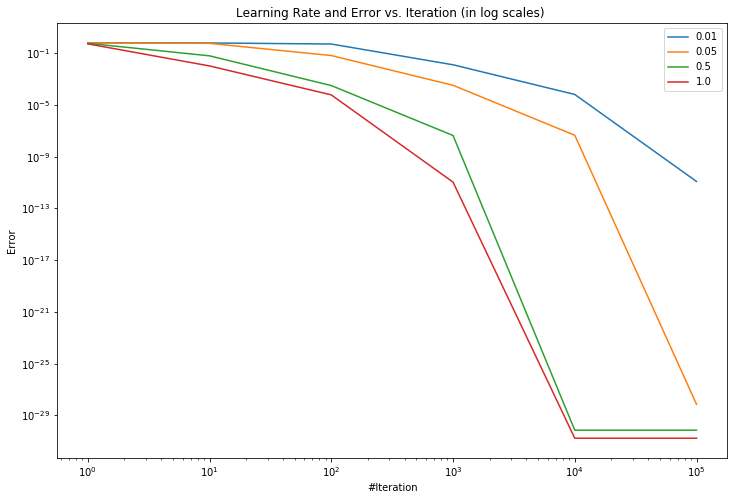

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

x = iterations
for lr in results.keys():
    errors = results[lr]
    plt.plot(x, errors, label = lr)
    
plt.xscale('log')
plt.xlabel('#Iteration')

plt.yscale('log')
plt.ylabel('Error')

# Set a title of the current axes.
plt.title('Learning Rate and Error vs. Iteration (in log scales) ')

# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Brief summary of findings for learning rate vs. backpropagation iterations:

The plot above shows the relationship betweeen learning rate (color of line), number of backpropagation iterations (x-axis) and error (y-axis). Note that the plot uses logarithmic scales in both dimensions.

We see that a too small learning rate does not lead to the best training results (e.g. lr = 0.01) , i.e. even after 100k iterations the error is still relatively high. However, for larger learning rates, the error starts to drop significantly as the number of iterations is increased, especially after 1000 iterations. 
Interestingly, when the learning rate is sufficiently large, say >= 0.5, there is an optimization minimum found after 10k iterations such that the error does not improve further with more iterations, here after 100k. See error curves for learning rates 0.5 and 1.0 above. However, this minimum could also occur due to numerical reasons since the error after 10k is extremely small already (1.673873863 × 10^-31, see prints above).
It seems, in this particular case, that for large enough learning rates, 10k iterations is enough for optimal fitting to this small "dataset" consisting of only one sample. What happens here though is a literal 100% overfitting to a dataset that consists of one sample.
In conclusion, the plot depicts very nicely the fact that the backpropagation algorithm works effectively to train the simple network to fit the sample data well when enough training iterations are performed.